# COGS 118A- Project Checkpoint

# Names

Hopefully your team is at least this good. Obviously you should replace these with your names.

- Will Sumerfield
- Diego Maradonna
- Johan Cruyff
- Roberto Carlos
- Franz Beckenbaur

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents and how they are measured
- what you will be doing with the data
- how performance/success will be measured

# Background

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 2 or 3 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. 

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

# Data

[Dataset Link](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

### Imports

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from matplotlib.patches import Patch
import re
warnings.filterwarnings('ignore')

### Data General Knowledge

As we can see below, our dataset is a collection of information related to heart health. The first column is a *True*
or *False* value which tells us whether that row's person has some form of heart disease. This is the variable we will
be trying to predict with our models, based on the information the other features provide.

We can see below that we have 17 different features with which to predict heart disease, and over 300,000 data points!

In [134]:
# Import the data as a dataframe
data = pd.read_csv("data/raw_data.csv")

# Display the number of columns in the dataframe
print(f"Number of Raw Features: {len(data.columns)}")
print()
print(f"Number of Datapoints: {data.shape[0]}")
print()

# Display the head of the dataframe
data.head()

Number of Raw Features: 18

Number of Datapoints: 319795



,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Data Visualization

In order to see what our data looks like, and correlations between the features and heart disease, we can plot or
display each feature against Heart Disease.

### Heart Disease

It is good idea to start by looking at the proportion of heart disease among the subjects.
As we can see below, heart disease is relatively rare. This means that we will likely need to use data sampling methods
which equivocate the number of samples with and without Heart Disease.

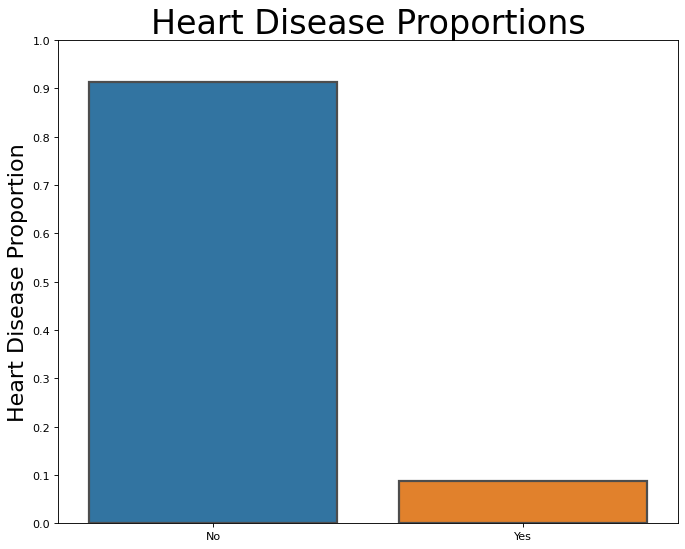

In [135]:
# Get a subset of the data for graphing
data = data.sample(100000)

# Get the heart disease data
heart_disease = data["HeartDisease"]

# Get an axis to plot to
fig, axis = plt.subplots(figsize=(10, 8), dpi=80)

# Plot the heart disease proportions
sns.barplot(x=heart_disease.unique(), y=heart_disease.value_counts()/heart_disease.value_counts().sum(),
           ax=axis, linewidth=2, edgecolor='0.3')

# Set the plot aesthetics
axis.set_title("Heart Disease Proportions", fontsize=30)
axis.set_yticks([round(0.1 * i, 1) for i in range(11)])
axis.set_yticklabels(axis.get_yticks(), size=10)
axis.set_xticklabels(labels=axis.get_xticklabels(), size=10)
axis.set_ylabel("Heart Disease Proportion", fontsize=20)

# Display the plot
plt.show()

### Continuously Valued Features

Some of the features in the dataset have continous values. In this case, it is helpful to plot them as a boxplot,
so that we can see the spread of the data. Below, we can see that Physical and Mental Health are strongly right skewed,
whereas BMI and Sleep Time are more normal in shape.

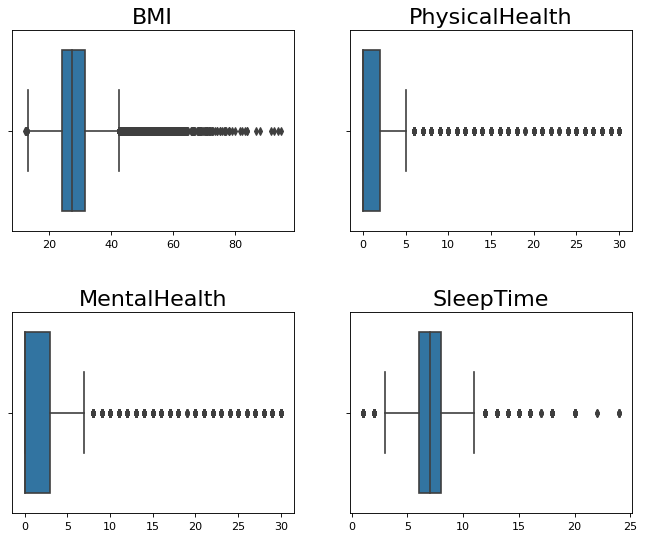

In [136]:
# Get all continuously valued features
continuous_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Get an axis to plot to
fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=80)

# Add spacing between plots
fig.subplots_adjust(hspace=0.4)

# Create a boxplot for each feature
for axis, feature in zip(axes.flatten(), continuous_features):

    # Plot the feature
    sns.boxplot(x=feature, data=data, ax=axis)

    # Set the plot aesthetics
    axis.set_title(feature, fontsize=20)
    axis.set_xlabel('')


# Display all box plots
plt.show()

### Comparison to Heart Disease

Now that we understand the spread of each of the continuous features, we should try to see how they
correlate with Heart Disease.

Below, we can clearly see that, predictably, people's reported Physical Health appears to correlate strongly with
Heart Disease.

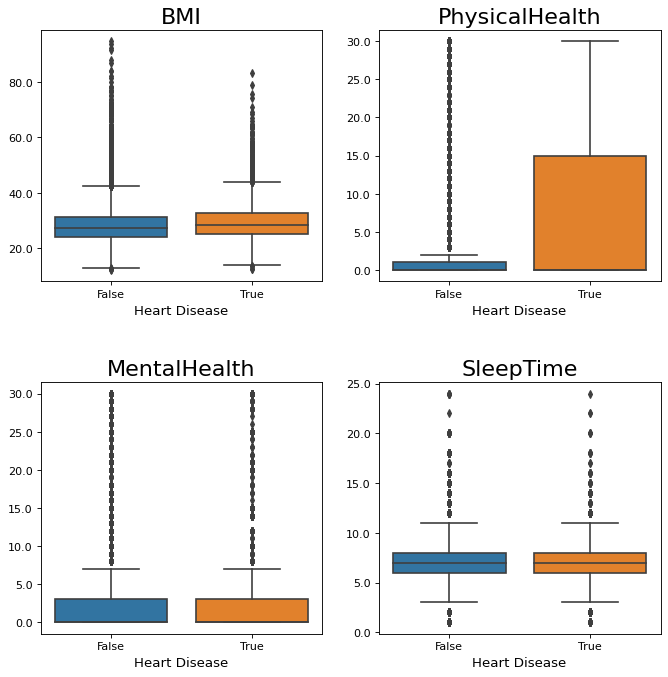

In [137]:
# Create a subplot for each feature in the dataset
fig, axes = plt.subplots(2, 2, figsize=(10, 10), dpi=80)

# Adjust the spacing between plots
fig.subplots_adjust(hspace=0.4)

# Graph each continuous feature
for index in range(len(continuous_features)):

    # Find the axis and feature
    axis = axes.flatten()[index]
    feature = continuous_features[index]

    # Plot the feature against heart disease
    sns.boxplot(x=heart_disease, y=feature, data=data, ax=axis)

    # Set the plot aesthetics
    axis.set_title(feature, fontsize=20)
    axis.set_yticklabels(axis.get_yticks(), size=10)
    axis.set_xticklabels(['False', 'True'], size=10)
    axis.set_xlabel("Heart Disease", fontsize=12)
    axis.set_ylabel("")

# Display all the plots
plt.show()

### Nominal Features

Now, we should analyze the trends of the nominal features. These values are mostly boolean, with some exceptions.
We can make use of stacked bar-plots to vizualize both the proportions within each feature, as well as the proportions of
heart disease for each value of that feature.

Below, we can see that many of our features do not have even distributions across their values.
This tells us that we will need to up/down sample our data in order to compensate. N

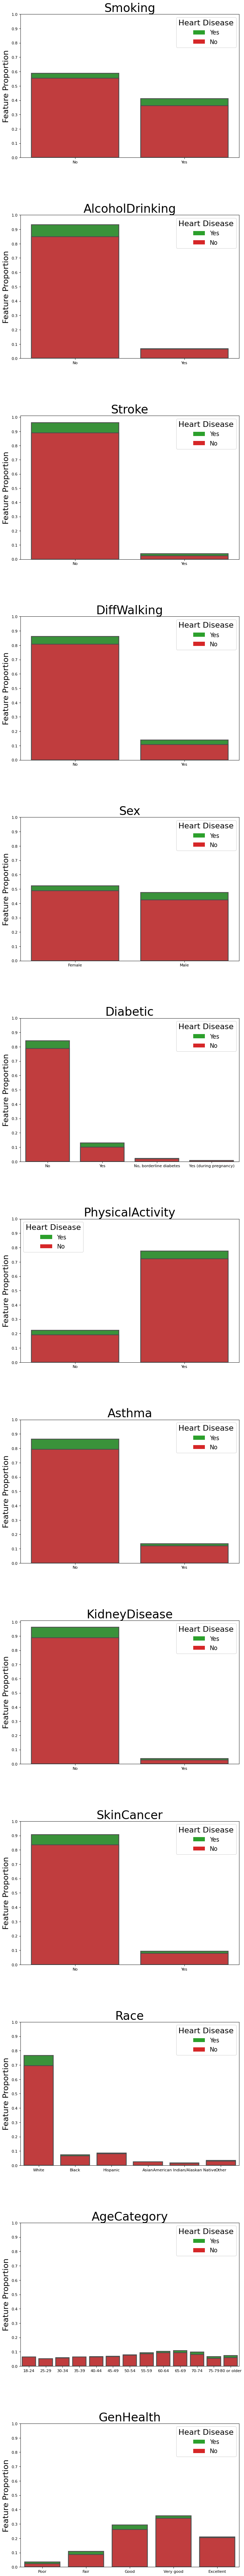

In [138]:
# Get all nominal features
nominal_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity',
                    'Asthma', 'KidneyDisease', 'SkinCancer', 'Race', 'AgeCategory', 'GenHealth']

# Set the order of each nominal feature's values
nominal_feature_orders = [
    ['No', 'Yes'],
    ['No', 'Yes'],
    ['No', 'Yes'],
    ['No', 'Yes'],
    ['Female', 'Male'],
    ['No', 'Yes', 'No, borderline diabetes', 'Yes (during pregnancy)'],
    ['No', 'Yes'],
    ['No', 'Yes'],
    ['No', 'Yes'],
    ['No', 'Yes'],
    ['White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaskan Native', 'Other'],
    sorted(data['AgeCategory'].unique(), key=lambda x: int(re.match('\d{2}?', x).group())),
    ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
]

# Create a subplot for each feature in the dataset
fig, axes = plt.subplots(len(nominal_features), figsize=(10, 120), dpi=80)

# Adjust the spacing between plots
fig.subplots_adjust(hspace=0.4)

# Graph each nominal feature
for index in range(len(nominal_features)):

    # Find the axis and feature
    axis = axes[index]
    feature = nominal_features[index]

    # Find the feature dataframe
    feature_data = data[feature]

    # Find the number of heart disease cases with the feature
    heart_disease_false = [data[(feature_data == f_class) & (heart_disease == 'No')].shape[0] / feature_data.shape[0]
                           for f_class in nominal_feature_orders[index]]
    heart_disease_true = [data[(feature_data == f_class) & (heart_disease == 'Yes')].shape[0] / feature_data.shape[0]
                           for f_class in nominal_feature_orders[index]]
    for f_class in range(len(heart_disease_true)): heart_disease_true[f_class] += heart_disease_false[f_class]

    # Plot the feature against heart disease
    sns.barplot(x=nominal_feature_orders[index], y=heart_disease_true, ax=axis, color=sns.color_palette()[2],
                linewidth=2, edgecolor='0.3')
    sns.barplot(x=nominal_feature_orders[index], y=heart_disease_false, estimator=sum, ci=None, ax=axis,
                color=sns.color_palette()[3], linewidth=2, edgecolor='0.3')

    # Set the plot asesthetics
    axis.set_title(feature, fontsize=30)
    axis.set_yticks([round(0.1 * i, 1) for i in range(11)])
    axis.set_yticklabels(axis.get_yticks(), size=10)
    axis.set_xticklabels(labels=axis.get_xticklabels(), size=10)
    axis.set_ylabel("Feature Proportion", fontsize=20)
    axis.legend(handles=[Patch(facecolor=sns.color_palette()[2]), Patch(facecolor=sns.color_palette()[3])],
                title="Heart Disease", labels=['Yes', 'No'], title_fontsize=20, fontsize=15)

# Display all the plots
plt.show()

# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



# Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

# Team Expectations 

Put things here that cement how you will interact/communicate as a team, how you will handle conflict and difficulty, how you will handle making decisions and setting goals/schedule, how much work you expect from each other, how you will handle deadlines, etc...
* *Team Expectation 1*
* *Team Expectation 2*
* *Team Expecation 3*
* ...

# Project Timeline Proposal

UPDATE THE PROPOSAL TIMELINE ACCORDING TO WHAT HAS ACTUALLY HAPPENED AND HOW IT HAS EFFECTED YOUR FUTURE PLANS

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic (Pelé) | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets (Beckenbaur)  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data ,do some EDA (Maradonna) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin programming for project (Cruyff) | Discuss/edit project code; Complete project |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Carlos)| Discuss/edit full project |
| 3/19  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
